# Анализ INTROSORT

## Тестирующая программа

Подробнее можно посмотреть [здесь](analyze/)

На выходе получем [файл](analyze/data.csv), содержащий следующие данные:

- `n`
- `quick_random`
- `quick_reversed`
- `quick_nearly`
- `intro_random`
- `intro_reversed`
- `intro_nearly`

То есть каждая строка содержит временные оценки для конкретного `n`


## Анализ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme("paper")

### Считывание данных

In [2]:
df = pd.read_csv("analyze/data.csv",
                 sep=' ',
                 names=["n",
                        "quick_random",
                        "quick_reversed",
                        "quick_nearly",
                        
                        "intro_random",
                        "intro_reversed",
                        "intro_nearly",],
                 index_col=0)
df

,quick_random,quick_reversed,quick_nearly,intro_random,intro_reversed,intro_nearly
n,,,,,,
500,63.6667,49.0000,50.0000,47.6667,30.3333,34.6667
600,76.6667,60.3333,60.6667,59.0000,35.0000,44.0000
700,91.3333,73.3333,71.3333,69.3333,41.6667,50.6667
800,106.0000,81.0000,83.0000,80.6667,46.6667,59.0000
900,117.3330,89.6667,90.0000,89.3333,55.0000,65.6667
...,...,...,...,...,...,...
9600,1414.3300,1071.3300,1089.0000,1204.0000,729.3330,867.6670
9700,1403.6700,1131.6700,1094.6700,1177.3300,747.6670,795.3330
9800,1425.6700,1062.0000,1080.6700,1211.3300,743.3330,721.6670


### Построение графиков

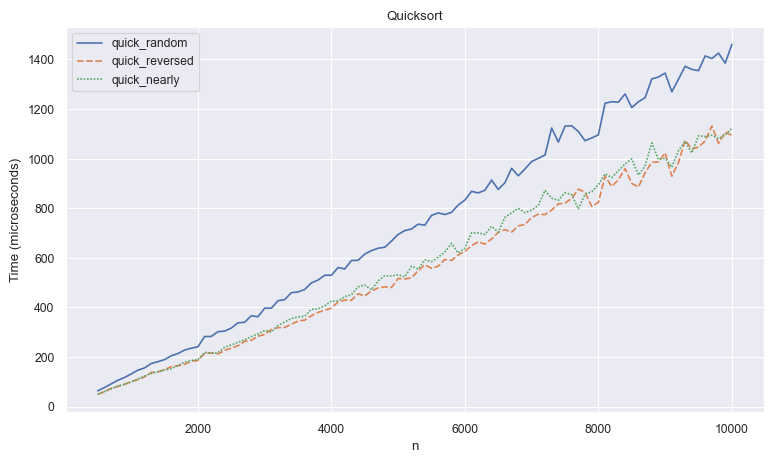

In [3]:
fig = plt.figure(figsize=(9, 5))
plt.title("Quicksort")

sns.lineplot(data=df[["quick_random", "quick_reversed", "quick_nearly"]])
plt.xlabel('n')
plt.ylabel('Time (microseconds)')
plt.show()

fig.savefig("static/quick.png")

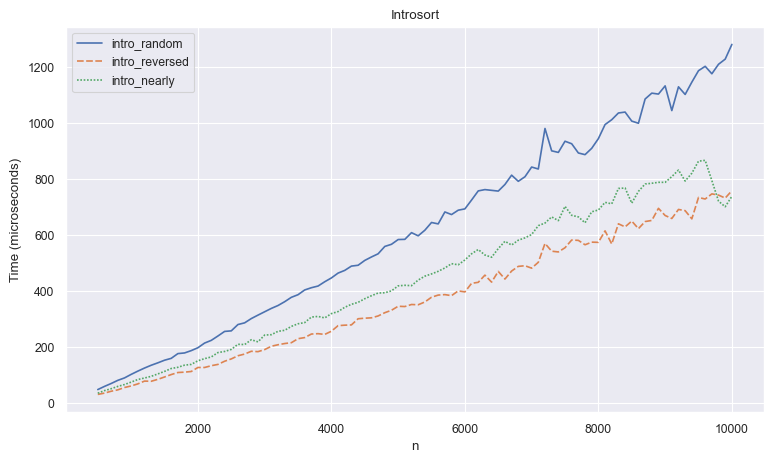

In [4]:
fig = plt.figure(figsize=(9, 5))
plt.title("Introsort")

sns.lineplot(data=df[["intro_random", "intro_reversed", "intro_nearly"]])
plt.xlabel('n')
plt.ylabel('Time (microseconds)')
plt.show()

fig.savefig("static/intro.png")

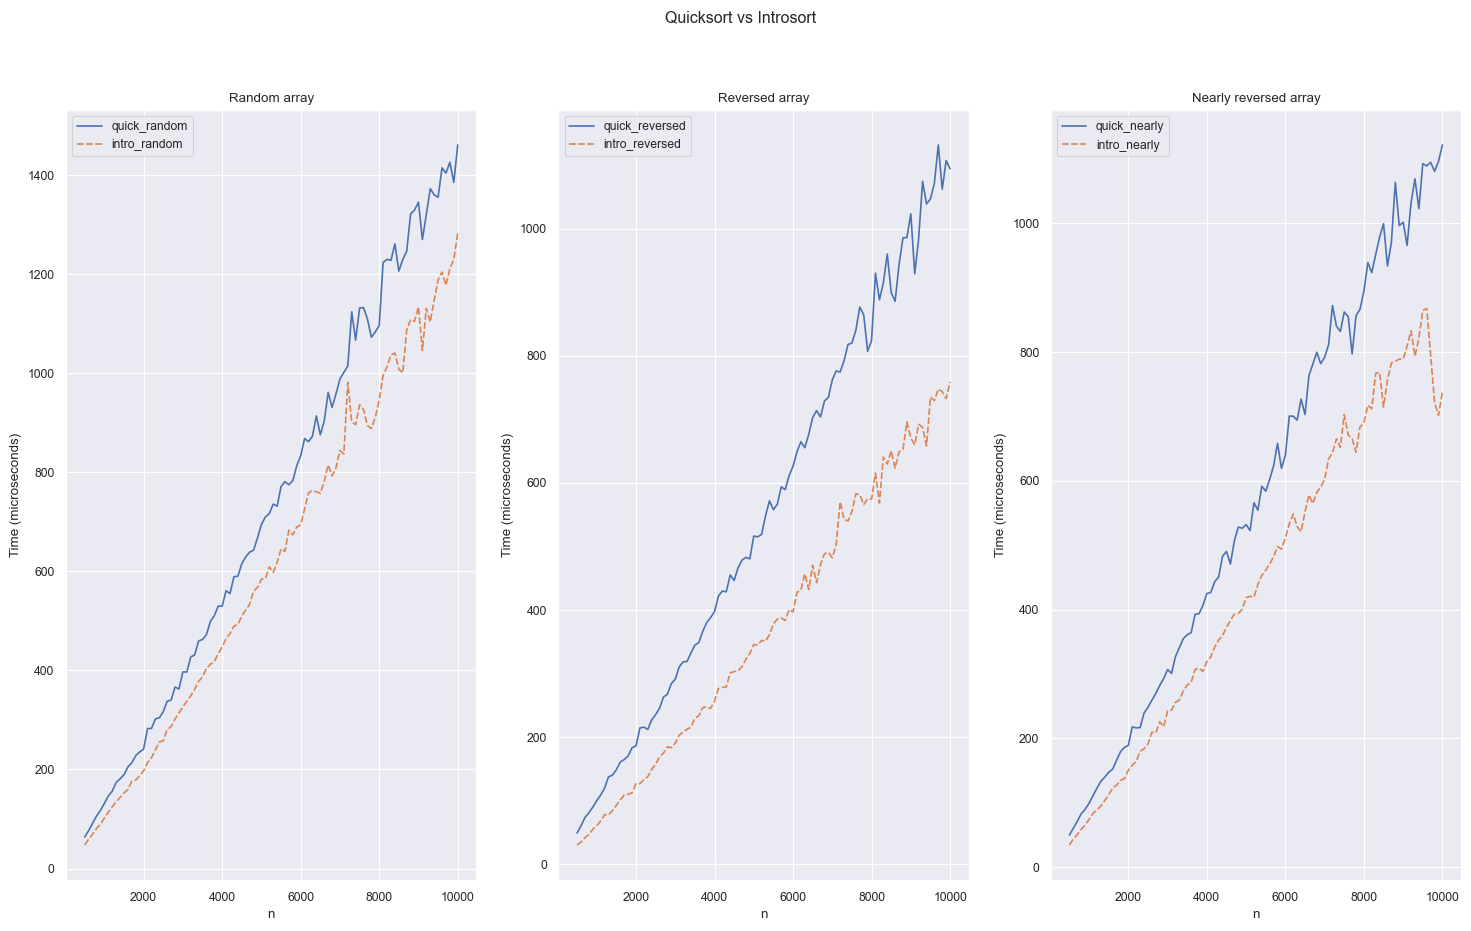

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle("Quicksort vs Introsort")

sns.lineplot(data=df[["quick_random", "intro_random"]], ax=axes[0])
sns.lineplot(data=df[["quick_reversed", "intro_reversed"]], ax=axes[1])
sns.lineplot(data=df[["quick_nearly", "intro_nearly"]], ax=axes[2])

axes[0].set_title("Random array")
axes[1].set_title("Reversed array")
axes[2].set_title("Nearly reversed array")

axes[0].set_ylabel("Time (microseconds)")
axes[1].set_ylabel("Time (microseconds)")
axes[2].set_ylabel("Time (microseconds)")

fig.savefig("static/array_types.png")